In [1]:
#Copied from https://github.com/JWarmenhoven/Coursera-Machine-Learning
# %load ../../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
data1 = loadmat('data/ex8data1.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [3]:
X1 = data1['X']
print('X1:', X1.shape)

X1: (307, 2)


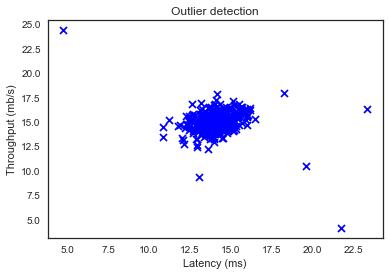

In [4]:
plt.scatter(X1[:,0], X1[:,1], c='b', marker='x')
plt.title("Outlier detection")
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)');

In [5]:
clf = EllipticEnvelope()
clf.fit(X1)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

c:\users\ywookim\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


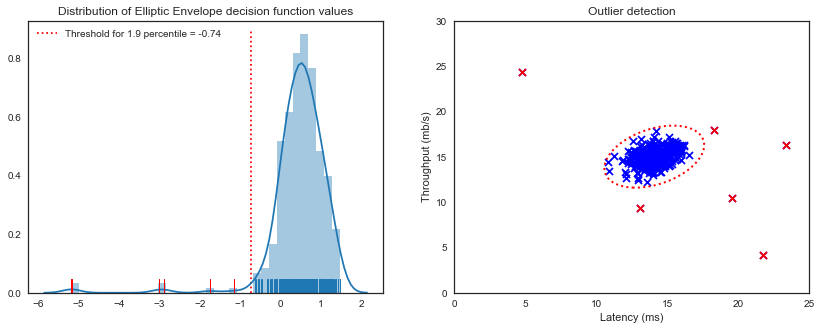

In [6]:
# Create the grid for plotting
xx, yy = np.meshgrid(np.linspace(0, 25, 200), np.linspace(0, 30, 200))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Calculate the decision function and use threshold to determine outliers
y_pred = clf.decision_function(X1).ravel()
percentile = 1.9
# np.percentile : 데이터셋 기준으로 입력된 퍼센테이지에 해당하는 위치값(?)  예를들어 0~200, 1.9 입력하면 3.8 리턴되겠지?
threshold = np.percentile(y_pred, percentile)
outliers = y_pred < threshold

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

# Left plot
# Plot the decision function values
sns.distplot(y_pred, rug=True, ax=ax1)
# Plot the decision function values for the outliers in red
sns.distplot(y_pred[outliers], rug=True, hist=False, kde=False, norm_hist=True, color='r', ax=ax1)
ax1.vlines(threshold, 0, 0.9, colors='r', linestyles='dotted',
           label='Threshold for {} percentile = {}'.format(percentile, np.round(threshold, 2)))
ax1.set_title('Distribution of Elliptic Envelope decision function values');
ax1.legend(loc='best')

# Right plot
# Plot the observations
ax2.scatter(X1[:,0], X1[:,1], c='b', marker='x')
# Plot outliers
ax2.scatter(X1[outliers][:,0], X1[outliers][:,1], c='r', marker='x', linewidths=2)
# Plot decision boundary based on threshold
ax2.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red', linestyles='dotted')
ax2.set_title("Outlier detection")
ax2.set_xlabel('Latency (ms)')
ax2.set_ylabel('Throughput (mb/s)');